this notebook is pretty much the same as v1 but I'm reducing the number of observations in the positive class

In [1]:
#imports
from fastai.vision.all  import *
from pathlib import Path
import pandas as pd

# data

In [2]:
!ls ../../../data/kickoffs

kickoff_returns_v1		kickoff_returns_v2_frame_sub60
kickoff_returns_v2_frame_sub10	kickoff_returns_v2_frame_sub70
kickoff_returns_v2_frame_sub20	kickoff_returns_v2_frame_sub80
kickoff_returns_v2_frame_sub30	kickoff_returns_v2_frame_sub90
kickoff_returns_v2_frame_sub40	plays.csv
kickoff_returns_v2_frame_sub50	v1


In [3]:
# import cv2
# im = cv2.imread('kickoffs/v1/2018090900_1992.png')
# print('width: ', im.shape[1])
# print('height:', im.shape[0])

In [4]:
data_path = '../../../data/kickoffs/'
plays = pd.read_csv(data_path + 'plays.csv'); plays.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,"J.Elliott kicks 65 yards from PHI 35 to end zone, Touchback.",1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Center-R.Lovato. J.Hardy to ATL 41 for 5 yards (K.Grugier-Hill). PENALTY on PHI-S.Gibson, Unsportsmanlike Conduct, 15 yards, enforced at ATL 41.",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18


In [5]:
df = plays.query('specialTeamsPlayType == "Kickoff" & specialTeamsResult == "Return"')[['gameId', 'playId', 'playResult']]
df['fname'] = df.apply(lambda row: str(row.gameId) + '_' + str(row.playId) + '.png', axis=1)
df['label'] = df.apply(lambda row: 1 if int(row.playResult) < 30 else 0 , axis=1)
df.head(3)

,gameId,playId,playResult,fname,label
3,2018090600,677,34,2018090600_677.png,0
9,2018090600,1606,60,2018090600_1606.png,0
24,2018090900,36,45,2018090900_36.png,0


In [6]:
df2 = df[['fname', 'label']]; df2.head(3)

,fname,label
3,2018090600_677.png,0
9,2018090600_1606.png,0
24,2018090900_36.png,0


In [7]:
sum(df2['label'])

405

In [8]:
len(df2)

2921

In [9]:
p = Path(data_path)
dls_sub10 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub10'), bs=32)
dls_sub20 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub20'), bs=32)
dls_sub30 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub30'), bs=32)
dls_sub40 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub40'), bs=32)
dls_sub50 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub50'), bs=32)
dls_sub60 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub60'), bs=32)
dls_sub70 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub70'), bs=32)
dls_sub80 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub80'), bs=32)
dls_sub90 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub90'), bs=32)

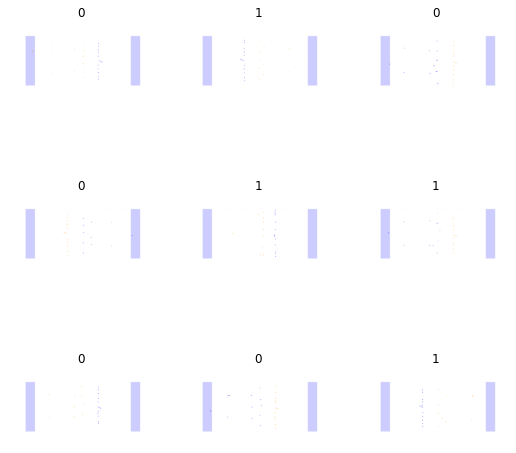

In [10]:
dls_sub10.show_batch()

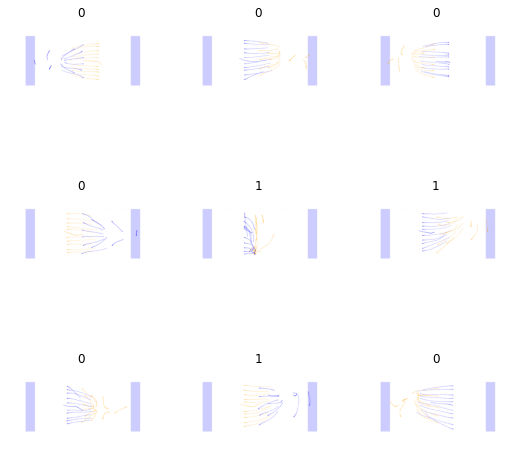

In [11]:
dls_sub50.show_batch()

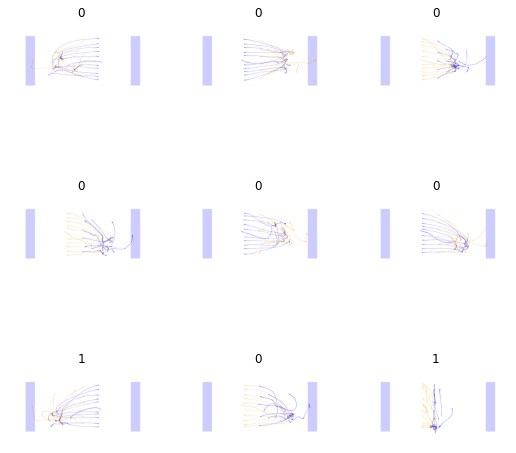

In [12]:
dls_sub90.show_batch()

# modeling - 10 frames

SuggestedLRs(valley=0.0012022644514217973)

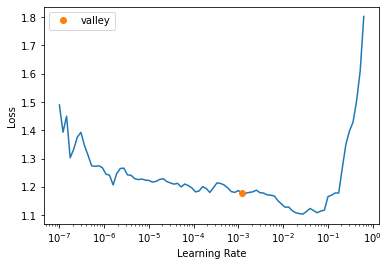

In [17]:
learn = cnn_learner(dls_sub10, resnet34, metrics=error_rate); learn.lr_find()

In [18]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [19]:
# SuggestedLRs(*lrs)
#https://github.com/fastai/fastai/blob/master/fastai/callback/schedule.py#L284

In [20]:
learn.fine_tune(6, 0.0014454397605732083)

epoch,train_loss,valid_loss,error_rate,time
0,0.963473,1.188074,0.510274,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.659791,3.664407,0.864726,01:01
1,0.592718,1.049868,0.130137,01:00
2,0.488879,0.434522,0.143836,01:01
3,0.405658,1.869011,0.746575,01:01
4,0.317933,0.364628,0.102740,01:00
5,0.243702,0.379647,0.102740,01:01


# modeling - 20 frames

SuggestedLRs(valley=0.0014454397605732083)

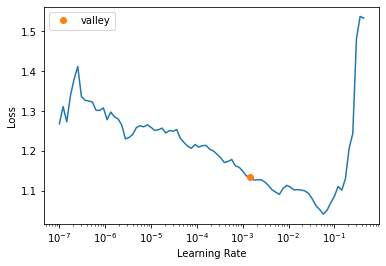

In [14]:
learn2 = cnn_learner(dls_sub20, resnet34, metrics=error_rate); learn2.lr_find()

In [23]:
learn2.fine_tune(12, 0.0014454397605732083)

epoch,train_loss,valid_loss,error_rate,time
0,0.896289,0.490739,0.174658,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.585416,1.409516,0.672945,01:01
1,0.491569,0.422650,0.160959,01:01
2,0.457538,2.408292,0.828767,01:00
3,0.411516,0.955733,0.544521,01:01
4,0.364502,0.408711,0.113014,01:01
5,0.293382,1.400205,0.128425,01:01
6,0.226930,0.664640,0.268836,01:01
7,0.151996,0.577098,0.114726,01:01
8,0.090906,0.589118,0.099315,01:01
9,0.052707,0.633567,0.104452,01:01


# modeling - 30 frames

SuggestedLRs(valley=0.0020892962347716093)

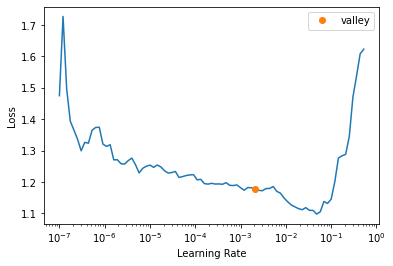

In [15]:
learn3 = cnn_learner(dls_sub30, resnet34, metrics=error_rate); learn3.lr_find()

In [24]:
learn3.fine_tune(12, 0.0020892962347716093)

epoch,train_loss,valid_loss,error_rate,time
0,0.886852,0.389138,0.111301,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.549481,9.026910,0.888699,01:01
1,0.457627,19.585054,0.888699,01:01
2,0.432898,1.031981,0.111301,01:01
3,0.409916,0.361933,0.095890,01:01
4,0.351593,0.411559,0.077055,01:00
5,0.284792,0.403168,0.116438,01:01
6,0.203622,0.640160,0.229452,01:01
7,0.113383,0.485112,0.073630,01:01
8,0.063035,0.470109,0.075342,01:01
9,0.036306,0.516497,0.070205,01:00


# modeling - 40 frames

SuggestedLRs(valley=0.004365158267319202)

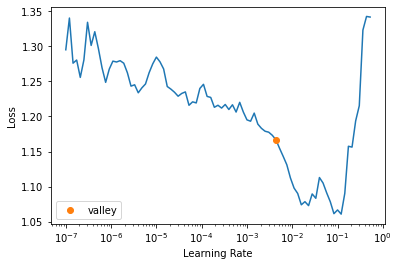

In [16]:
learn4 = cnn_learner(dls_sub40, resnet34, metrics=error_rate); learn4.lr_find()

In [25]:
learn4.fine_tune(12, 0.004365158267319202)

epoch,train_loss,valid_loss,error_rate,time
0,0.814085,0.358901,0.116438,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.447115,0.362046,0.128425,01:01
1,0.408331,0.321683,0.094178,01:01
2,0.413841,0.286524,0.083904,01:01
3,0.384222,8.494167,0.890411,01:01
4,0.360347,1.099790,0.109589,01:00
5,0.299178,0.330431,0.073630,01:01
6,0.224829,1.079005,0.109589,01:00
7,0.151593,0.906286,0.368151,01:01
8,0.068571,0.519968,0.075342,01:00
9,0.026800,0.498279,0.075342,01:00


# modeling - 50 frames

SuggestedLRs(valley=0.001737800776027143)

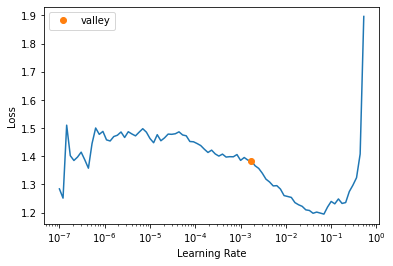

In [17]:
learn5 = cnn_learner(dls_sub50, resnet34, metrics=error_rate); learn5.lr_find()

In [26]:
learn5.fine_tune(12, 0.001737800776027143)

epoch,train_loss,valid_loss,error_rate,time
0,0.965943,0.483247,0.227740,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.605415,0.930450,0.469178,01:01
1,0.494781,0.336066,0.085616,01:01
2,0.431674,0.462360,0.083904,01:00
3,0.397607,0.366249,0.082192,01:01
4,0.329755,0.380325,0.125000,01:00
5,0.279789,1.394639,0.474315,01:01
6,0.176226,0.493625,0.126712,01:01
7,0.107488,0.408677,0.104452,01:01
8,0.058461,0.497515,0.148973,01:01
9,0.031243,0.504662,0.082192,01:01


# modeling - 60 frames

SuggestedLRs(valley=0.0020892962347716093)

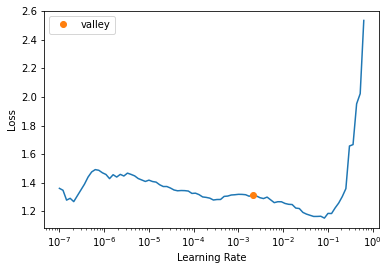

In [19]:
learn6 = cnn_learner(dls_sub60, resnet34, metrics=error_rate); learn6.lr_find()

In [27]:
learn6.fine_tune(12, 0.0020892962347716093)

epoch,train_loss,valid_loss,error_rate,time
0,0.893820,0.497597,0.203767,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.489847,1.206778,0.611301,01:00
1,0.448984,1.743234,0.652397,01:01
2,0.429594,0.559859,0.099315,01:00
3,0.393356,0.801707,0.142123,01:01
4,0.316911,0.396933,0.095890,01:01
5,0.260947,0.412346,0.099315,01:00
6,0.165920,0.456701,0.123288,01:01
7,0.100680,0.546476,0.143836,01:01
8,0.056980,0.555574,0.097603,01:00
9,0.028289,0.524439,0.114726,01:00


# modeling - 70 frames

SuggestedLRs(valley=0.0030199517495930195)

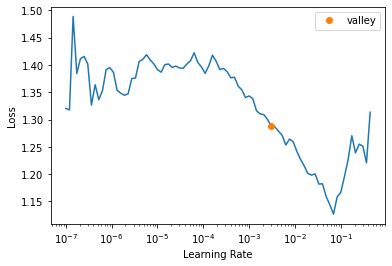

In [20]:
learn7 = cnn_learner(dls_sub70, resnet34, metrics=error_rate); learn7.lr_find()

In [28]:
learn7.fine_tune(12, 0.0030199517495930195)

epoch,train_loss,valid_loss,error_rate,time
0,0.843286,0.500615,0.178082,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.485076,0.464803,0.107877,01:01
1,0.457152,0.401680,0.109589,01:01
2,0.403635,0.545462,0.099315,01:01
3,0.348009,1.503035,0.710616,01:00
4,0.304673,0.839095,0.291096,01:01
5,0.219077,0.439585,0.126712,01:00
6,0.144290,0.821318,0.363014,01:01
7,0.076390,0.616049,0.092466,01:01
8,0.040597,0.619634,0.107877,01:00
9,0.018807,0.621337,0.097603,01:00


# modeling - 80 frames

SuggestedLRs(valley=0.0020892962347716093)

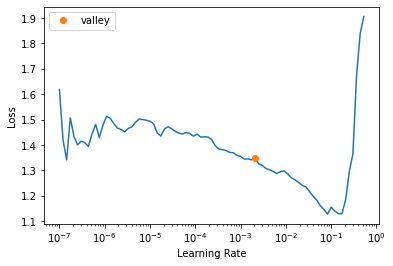

In [21]:
learn8 = cnn_learner(dls_sub80, resnet34, metrics=error_rate); learn8.lr_find()

In [29]:
learn8.fine_tune(12, 0.0020892962347716093)

epoch,train_loss,valid_loss,error_rate,time
0,0.885063,0.458734,0.145548,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.492496,1.286775,0.609589,01:01
1,0.425191,1.365498,0.618151,01:01
2,0.396432,0.805345,0.123288,01:01
3,0.349951,2.529665,0.763699,01:01
4,0.282699,0.471123,0.133562,01:01
5,0.182527,0.569018,0.195205,01:00
6,0.145914,0.858493,0.385274,01:01
7,0.095862,0.564708,0.162671,01:01
8,0.052688,0.590959,0.131849,01:01
9,0.027409,0.699101,0.114726,01:01


# modeling - 90 frames

SuggestedLRs(valley=0.004365158267319202)

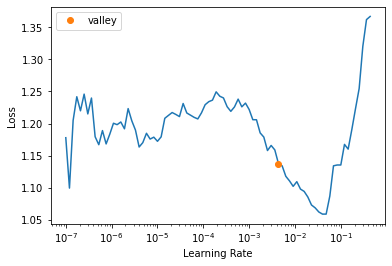

In [22]:
learn9 = cnn_learner(dls_sub90, resnet34, metrics=error_rate); learn9.lr_find()

In [30]:
learn9.fine_tune(12, 0.004365158267319202)

epoch,train_loss,valid_loss,error_rate,time
0,0.754857,0.530963,0.118151,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.387279,4.208028,0.842466,01:01
1,0.363265,0.480212,0.114726,01:01
2,0.352841,0.518310,0.174658,01:01
3,0.310989,0.523878,0.169521,01:01
4,0.257264,1.328752,0.154110,01:01
5,0.179571,0.863694,0.126712,01:01
6,0.111021,0.645052,0.178082,01:00
7,0.064247,0.592922,0.130137,01:01
8,0.031592,0.934319,0.111301,01:01
9,0.015743,0.732953,0.113014,01:01
